<a href="https://colab.research.google.com/github/ImdadKhan0266/CSML-1010/blob/main/Project_Saira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Fetching

In [1]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
import os
import polars as pl
import plotly.express as px
pl.Config.set_fmt_float("full") # to get rid of scientific notation while printing stuff
pl.Config.set_tbl_width_chars(1000)


polars.config.Config

In [5]:
# make sure you are storing your tmdb data in this directory
os.makedirs('/content/drive/MyDrive/project_dva', exist_ok=True)
# Change directory
os.chdir('/content/drive/MyDrive/project_dva')
# Fetching our tmdb data
df = pl.read_parquet('tmdb_clean_data.parquet')

In [4]:
df_orig = df.clone()

In [3]:
# with pl.Config(tbl_cols=-1):
#   print(df.head(5))
df.head()

id,title,original_title,release_date,popularity,vote_average,vote_count,budget,revenue,runtime,status,tagline,homepage,imdb_id,overview,adult,video,original_language,poster_path,backdrop_path,genres,production_companies,production_countries,spoken_languages,genre_Drama,genre_Documentary,genre_Comedy,genre_Horror,genre_Thriller,genre_Romance,genre_Action,genre_Music,genre_TV Movie,genre_Animation,genre_Science Fiction,genre_Crime,genre_Family,…,Writer_name_3,Writer_name_3_popularity,Writer_name_4,Writer_name_4_popularity,Writer_name_5,Writer_name_5_popularity,Musician_name_1,Musician_name_1_popularity,Musician_name_2,Musician_name_2_popularity,Musician_name_3,Musician_name_3_popularity,Musician_name_4,Musician_name_4_popularity,Musician_name_5,Musician_name_5_popularity,movie_idcredits_df,Actor_1_name,Actor_1_popularity,Actor_2_name,Actor_2_popularity,Actor_3_name,Actor_3_popularity,Actor_4_name,Actor_4_popularity,Actor_5_name,Actor_5_popularity,Actor_6_name,Actor_6_popularity,Actor_7_name,Actor_7_popularity,Actor_8_name,Actor_8_popularity,Actor_9_name,Actor_9_popularity,Actor_10_name,Actor_10_popularity
i64,str,str,str,f64,f64,i64,i64,i64,i64,str,str,str,str,str,bool,bool,str,str,str,list[str],list[str],str,list[str],i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,…,str,f64,str,f64,str,f64,str,f64,str,f64,str,f64,str,f64,str,f64,f64,str,f64,str,f64,str,f64,str,f64,str,f64,str,f64,str,f64,str,f64,str,f64,str,f64
98,"""Gladiator""","""Gladiator""","""2000-05-04""",5.174,8.218,19470,103000000,465361176,155,"""Released""","""What we do in life echoes in e…","""""","""tt0172495""","""After the death of Emperor Mar…",false,false,"""en""","""/ty8TGRuvJLPUmAR1H1nRIsgwvim.j…","""/Ar7QuJ7sJEiC0oP3I8fKBKIQD9u.j…","[""Action"", ""Drama"", ""Adventure""]","[""Universal Pictures"", ""Scott Free Productions"", … ""DreamWorks Pictures""]","""[""United Kingdom"", ""United Sta…","[""English""]",1,0,0,0,0,0,1,0,0,0,0,0,0,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,98,"""Russell Crowe""",0.088,"""Joaquin Phoenix""",0.086,"""Connie Nielsen""",0.082,"""Tommy Flanagan""",0.052,"""Derek Jacobi""",0.043,"""Djimon Hounsou""",0.04,"""Spencer Treat Clark""",0.037,"""Ralf Moeller""",0.034,"""Omid Djalili""",0.031,"""Sven-Ole Thorsen""",0.029
77,"""Memento""","""Memento""","""2000-10-11""",4.971,8.176,15144,9000000,40047236,113,"""Released""","""Some memories are best forgott…","""""","""tt0209144""","""Leonard Shelby is tracking dow…",false,false,"""en""","""/fKTPH2WvH8nHTXeBYBVhawtRqtR.j…","""/7Wev9JMo6R5XAfz2KDvXb7oPMmy.j…","[""Mystery"", ""Thriller""]","[""Newmarket Films"", ""Summit Entertainment"", … ""I Remember Productions""]","""[""United States of America""]""","[""English""]",0,0,0,0,1,0,0,0,0,0,0,0,0,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,77,"""Guy Pearce""",0.105,"""Carrie-Anne Moss""",0.05,"""Thomas Lennon""",0.05,"""Joe Pantoliano""",0.046,"""Stephen Tobolowsky""",0.043,"""Mark Boone Junior""",0.037,"""Callum Keith Rennie""",0.035,"""Jorja Fox""",0.033,"""Marianne Muellerleile""",0.029,"""Harriet Sansom Harris""",0.025
9741,"""Unbreakable""","""Unbreakable""","""2000-11-22""",4.907,7.1,9389,75000000,248118121,106,"""Released""","""Are you ready for the truth?""","""""","""tt0217869""","""An ordinary man makes an extra…",false,false,"""en""","""/mLuehrGLiK5zFCyRmDDOH6gbfPf.j…","""/A7CYNTa3fWyU0t207XiecgriQv5.j…","[""Thriller"", ""Drama"", ""Mystery""]","[""Barry Mendel Productions"", ""Blinding Edge Pictures"", ""Touchstone Pictures""]","""[""United States of America""]""","[""English""]",1,0,0,0,1,0,0,0,0,0,0,0,0,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,9741,"""Samuel L. Jackson""",0.158,"""Bruce Willis""",0.121,"""Robin Wright""",0.067,"""Spencer Treat Clark""",0.037,"""Michael Kelly""",0.03,"""Eamonn Walker""",0.029,"""Damian Young""",0.026,"""Chance Kelly""",0.025,"""James Handy""",0.025,"""Leslie Stefanson""",0.02

# Data Sanity and Cleaning

In [ ]:
# checking for nulls
df.null_count()
# No missing data found

id,title,original_title,release_date,popularity,vote_average,vote_count,budget,revenue,runtime,status,tagline,homepage,imdb_id,overview,adult,video,original_language,poster_path,backdrop_path,genres,production_companies,production_countries,spoken_languages,genre_Drama,genre_Documentary,genre_Comedy,genre_Horror,genre_Thriller,genre_Romance,genre_Action,genre_Music,genre_TV Movie,genre_Animation,genre_Science Fiction,genre_Crime,genre_Family,…,Writer_name_3,Writer_name_3_popularity,Writer_name_4,Writer_name_4_popularity,Writer_name_5,Writer_name_5_popularity,Musician_name_1,Musician_name_1_popularity,Musician_name_2,Musician_name_2_popularity,Musician_name_3,Musician_name_3_popularity,Musician_name_4,Musician_name_4_popularity,Musician_name_5,Musician_name_5_popularity,movie_idcredits_df,Actor_1_name,Actor_1_popularity,Actor_2_name,Actor_2_popularity,Actor_3_name,Actor_3_popularity,Actor_4_name,Actor_4_popularity,Actor_5_name,Actor_5_popularity,Actor_6_name,Actor_6_popularity,Actor_7_name,Actor_7_popularity,Actor_8_name,Actor_8_popularity,Actor_9_name,Actor_9_popularity,Actor_10_name,Actor_10_popularity
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,…,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,11688,0,0,0,0,11153,47992,12246,45844,34274,27438,0,0,0,0,0,0,0,0,0,0,0,0,0,…,104786,104786,107339,107339,107927,107927,107250,107250,107872,107872,108022,108022,108111,108111,108179,108179,17172,19001,19001,28993,28993,35845,35845,42452,42452,49265,49265,55471,55471,60854,60854,65313,65313,69516,69516,73204,73204


In [ ]:
# Getting numeric columns for some EDA
numeric_columns = [col for col in df.columns if df[col].dtype not in (pl.Utf8, pl.Categorical, pl.List)]
numeric_columns.remove('id') # id not needed
numeric_columns

['popularity',
 'vote_average',
 'vote_count',
 'budget',
 'revenue',
 'runtime',
 'adult',
 'video',
 'genre_Drama',
 'genre_Documentary',
 'genre_Comedy',
 'genre_Horror',
 'genre_Thriller',
 'genre_Romance',
 'genre_Action',
 'genre_Music',
 'genre_TV Movie',
 'genre_Animation',
 'genre_Science Fiction',
 'genre_Crime',
 'genre_Family',
 'genre_Mystery',
 'genre_Adventure',
 'company_BBC',
 'company_Lifetime',
 'company_Universal Pictures',
 'company_Reel One Entertainment',
 'company_Warner Bros. Pictures',
 'company_HBO Documentary Films',
 'company_Lionsgate',
 'company_MarVista Entertainment',
 'company_The Asylum',
 'company_Paramount Pictures',
 'language_English',
 'language_Español',
 'language_Français',
 'language_Deutsch',
 'language_No Language',
 'language_Italiano',
 'language_',
 'language_Português',
 'language_Pусский',
 'language_العربية',
 'movie_id',
 'Producer_name_1_popularity',
 'Producer_name_2_popularity',
 'Producer_name_3_popularity',
 'Producer_name_4_pop

In [ ]:

# Checking 0 count here
zero_counts = df.select(numeric_columns).select([
    (pl.col(col).eq(0).sum() / pl.len() * 100).round(2).alias(f"{col}")  for col in numeric_columns
])

zero_counts



popularity,vote_average,vote_count,budget,revenue,runtime,adult,video,genre_Drama,genre_Documentary,genre_Comedy,genre_Horror,genre_Thriller,genre_Romance,genre_Action,genre_Music,genre_TV Movie,genre_Animation,genre_Science Fiction,genre_Crime,genre_Family,genre_Mystery,genre_Adventure,company_BBC,company_Lifetime,company_Universal Pictures,company_Reel One Entertainment,company_Warner Bros. Pictures,company_HBO Documentary Films,company_Lionsgate,company_MarVista Entertainment,company_The Asylum,company_Paramount Pictures,language_English,language_Español,language_Français,language_Deutsch,language_No Language,language_Italiano,language_,language_Português,language_Pусский,language_العربية,movie_id,Producer_name_1_popularity,Producer_name_2_popularity,Producer_name_3_popularity,Producer_name_4_popularity,Producer_name_5_popularity,Director_name_1_popularity,Director_name_2_popularity,Director_name_3_popularity,Director_name_4_popularity,Director_name_5_popularity,Writer_name_1_popularity,Writer_name_2_popularity,Writer_name_3_popularity,Writer_name_4_popularity,Writer_name_5_popularity,Musician_name_1_popularity,Musician_name_2_popularity,Musician_name_3_popularity,Musician_name_4_popularity,Musician_name_5_popularity,movie_idcredits_df,Actor_1_popularity,Actor_2_popularity,Actor_3_popularity,Actor_4_popularity,Actor_5_popularity,Actor_6_popularity,Actor_7_popularity,Actor_8_popularity,Actor_9_popularity,Actor_10_popularity
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0,0.37,0,85.78,92.88,4.73,100,100,73.88,76.76,80.11,85.78,87.6,92.26,92.96,93.55,93.73,94.47,94.52,94.99,95.48,95.87,96.25,99.11,99.53,99.57,99.6,99.65,99.66,99.67,99.68,99.71,99.72,29.97,97.28,97.51,98.32,98.92,99.01,99.15,99.3,99.31,99.43,0,0,0,0,0,0,0.01,0,0,0,0,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.01,0,0,0,0.01


**Too many 0s. removing data that has 0 vote_average**

In [ ]:
df = df.filter(pl.col("vote_average")>0)
df.shape

(107978, 121)

In [ ]:
# Checking summary of numeric columns

desc = df.select(numeric_columns).describe()
desc = pl.DataFrame(desc)
summary_df_rounded = desc.with_columns([
    pl.col(pl.Float64).round(2)  # Round all float64 columns to 2 decimal places
])


(summary_df_rounded)



statistic,popularity,vote_average,vote_count,budget,revenue,runtime,adult,video,genre_Drama,genre_Documentary,genre_Comedy,genre_Horror,genre_Thriller,genre_Romance,genre_Action,genre_Music,genre_TV Movie,genre_Animation,genre_Science Fiction,genre_Crime,genre_Family,genre_Mystery,genre_Adventure,company_BBC,company_Lifetime,company_Universal Pictures,company_Reel One Entertainment,company_Warner Bros. Pictures,company_HBO Documentary Films,company_Lionsgate,company_MarVista Entertainment,company_The Asylum,company_Paramount Pictures,language_English,language_Español,language_Français,…,language_Italiano,language_,language_Português,language_Pусский,language_العربية,movie_id,Producer_name_1_popularity,Producer_name_2_popularity,Producer_name_3_popularity,Producer_name_4_popularity,Producer_name_5_popularity,Director_name_1_popularity,Director_name_2_popularity,Director_name_3_popularity,Director_name_4_popularity,Director_name_5_popularity,Writer_name_1_popularity,Writer_name_2_popularity,Writer_name_3_popularity,Writer_name_4_popularity,Writer_name_5_popularity,Musician_name_1_popularity,Musician_name_2_popularity,Musician_name_3_popularity,Musician_name_4_popularity,Musician_name_5_popularity,movie_idcredits_df,Actor_1_popularity,Actor_2_popularity,Actor_3_popularity,Actor_4_popularity,Actor_5_popularity,Actor_6_popularity,Actor_7_popularity,Actor_8_popularity,Actor_9_popularity,Actor_10_popularity
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",107978,107978,107978,107978,107978,107978,107978,107978,107978,107978,107978,107978,107978,107978,107978,107978,107978,107978,107978,107978,107978,107978,107978,107978,107978,107978,107978,107978,107978,107978,107978,107978,107978,107978,107978,107978,…,107978,107978,107978,107978,107978,100345,51803,28927,14814,7273,3407,98799,9999,1394,638,449,57025,15596,3579,1033,446,1125,504,355,266,198,90902,89081,79123,72310,65733,58950,52781,47421,42983,38798,35123
"""null_count""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,7633,56175,79051,93164,100705,104571,9179,97979,106584,107340,107529,50953,92382,104399,106945,107532,106853,107474,107623,107712,107780,17076,18897,28855,35668,42245,49028,55197,60557,64995,69180,72855
"""mean""",0.61,5.96,145.66,1896985.81,4816740.28,65.32,0,0,0.26,0.23,0.2,0.14,0.12,0.08,0.07,0.06,0.06,0.06,0.05,0.05,0.05,0.04,0.04,0.01,0,0,0,0,0,0,0,0,0,0.7,0.03,0.02,…,0.01,0.01,0.01,0.01,0.01,524026.6,0.01,0,0,0,0,0.01,0,0,0,0,0.01,0,0,0,0,0,0,0,0,0,516503.88,0.31,0.09,0.05,0.04,0.03,0.02,0.02,0.01,0.01,0.01
"""std""",1.09,2.14,1001.88,13252227.13,48819186.93,68.66,null,null,0.44,0.42,0.4,0.35,0.33,0.27,0.26,0.25,0.24,0.23,0.23,0.22,0.21,0.2,0.19,0.09,0.07,0.07,0.06,0.06,0.06,0.06,0.06,0.05,0.05,0.46,0.16,0.16,…,0.1,0.09,0.08,0.08,0.08,372638.09,0.25,0.02,0.01,0,0,0.21,0.03,0.05,0,0,0.17,0.07,0.01,0,0,0,0,0,0,0,379276.92,4.03,1.44,0.85,0.59,0.48,0.39,0.3,0.28,0.23,0.19
"""min""",0,0.5,1,0,-12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0
"""25%""",0.05,4.9,1,0,0,19,null,null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,222159,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,199966,0,0,0,0,0,0,0,0,0,0
"""50%""",0.11,6,3,0,0,80,null,null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,…,0,0,0,0,0,466306,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,456659,0.01,0.01,0,0,0,0,0,0,0,0
"""75%""",0.43,7.1,12,0,0,93,null,null,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,…,0,0,0,0,0,779796,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,781188,0.03,0.02,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.01
"""max""",7.68,10,37197,460000000,2923706026,14400,0,0,1,1,1,1,1,1,1,1,1,1,1,1,

In [ ]:
# Checking empty values in character columns
char_columns = [col for col in df.columns if df[col].dtype in (pl.Utf8, pl.Categorical)]


empty_counts = df.select(char_columns).select([
    (pl.col(col).eq("").sum() / pl.len() * 100).round(2).alias(f"{col}")  for col in char_columns
])

empty_counts

title,original_title,release_date,status,tagline,homepage,imdb_id,overview,original_language,poster_path,backdrop_path,production_countries,Producer_name_1,Producer_name_2,Producer_name_3,Producer_name_4,Producer_name_5,Director_name_1,Director_name_2,Director_name_3,Director_name_4,Director_name_5,Writer_name_1,Writer_name_2,Writer_name_3,Writer_name_4,Writer_name_5,Musician_name_1,Musician_name_2,Musician_name_3,Musician_name_4,Musician_name_5,Actor_1_name,Actor_2_name,Actor_3_name,Actor_4_name,Actor_5_name,Actor_6_name,Actor_7_name,Actor_8_name,Actor_9_name,Actor_10_name
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0,0,0,0,63.61,68.56,2.92,0.97,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
is_id_unique = df.select(pl.col('id').n_unique()).item() == df.height
print(is_id_unique)

True


#EDA

In [ ]:
# EDA Plots
agg_df = df.group_by("production_countries").agg([
    pl.col("id").count().alias("count"),
    (pl.col("vote_average").eq(0).sum() / pl.count() * 100).alias("vote_average_zeros_percentage")
])
agg_df=agg_df.sort("count", descending=True)
#agg_df = agg_df.filter(pl.col("count")>10000) #pick only rows with count over 1k
agg_df = agg_df.head(10)
pandas_df = agg_df.to_pandas()

# Create a bar plot using Plotly
fig = px.bar(pandas_df, x="production_countries", y="count", title="Count by production_countries")
fig.show()

fig2 = px.bar(pandas_df, x="production_countries", y="vote_average_zeros_percentage", title="vote_average zeros percentage by production_countries")
fig2.show()



<ipython-input-26-55a4f74d798c>:4: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  (pl.col("vote_average").eq(0).sum() / pl.count() * 100).alias("vote_average_zeros_percentage")


**Why so many empty values in production_countries**

In [ ]:
# Check correlation of vote average with revenue
df_filtered = df.filter((pl.col("vote_average") > 0) & (pl.col("revenue") > 0) & (pl.col("budget") > 0) & (pl.col("vote_count") > 100))
correlation = df_filtered.select([
    pl.col("vote_average"),
    pl.col("revenue")/pl.col("budget")
]).corr()
correlation


vote_average,revenue
f64,f64
1,0.02189155528518268
0.02189155528518268,1


Run a baseline model on the data.

# Baseline Model

In [ ]:
# Step 0: Import libraries
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np
import ast


pd.set_option('display.max_rows', 150)

In [ ]:

# Step 1: Convert Polars DataFrame to pandas DataFrame
df_pd = df.to_pandas()
# df_pd.dtypes

In [ ]:
def parse_as_list(x):
    if isinstance(x, str):
        try:
            # Attempt to parse the string into a Python object
            parsed = ast.literal_eval(x)
            # Only return it if it’s truly a list
            if isinstance(parsed, list):
                return parsed
        except (SyntaxError, ValueError):
            pass
    # If it's not a string or couldn't parse, return an empty list or None
    return []

df_pd['production_countries'] = df_pd['production_countries'].apply(parse_as_list)
df_pd.head()
# mlb = MultiLabelBinarizer()
# countries_onehot = mlb.fit_transform(df_pd['production_countries'])


,id,title,original_title,release_date,popularity,vote_average,vote_count,budget,revenue,runtime,...,Actor_6_name,Actor_6_popularity,Actor_7_name,Actor_7_popularity,Actor_8_name,Actor_8_popularity,Actor_9_name,Actor_9_popularity,Actor_10_name,Actor_10_popularity
0,98,Gladiator,Gladiator,2000-05-04,5.174,8.218,19470,103000000,465361176,155,...,Djimon Hounsou,0.040,Spencer Treat Clark,0.037,Ralf Moeller,0.034,Omid Djalili,0.031,Sven-Ole Thorsen,0.029
1,77,Memento,Memento,2000-10-11,4.971,8.176,15144,9000000,40047236,113,...,Mark Boone Junior,0.037,Callum Keith Rennie,0.035,Jorja Fox,0.033,Marianne Muellerleile,0.029,Harriet Sansom Harris,0.025
2,9741,Unbreakable,Unbreakable,2000-11-22,4.907,7.100,9389,75000000,248118121,106,...,Eamonn Walker,0.029,Damian Young,0.026,Chance Kelly,0.025,James Handy,0.025,Leslie Stefanson,0.020
3,107,Snatch,Snatch,2000-09-01,4.870,7.814,9205,10000000,83600000,103,...,Rade Šerbedžija,0.035,Vinnie Jones,0.035,Alan Ford,0.028,Lennie James,0.028,Ewen Bremner,0.023
4,9532,Final Destination,Final Destination,2000-03-17,4.200,6.603,5757,23000000,112880294,98,...,Alessandro Juliani,0.026,Kerr Smith,0.025,Brendan Fehr,0.022,Christine Chatelain,0.021,P. Lynn Johnson,0.021


In [ ]:
print(type(df_pd['production_countries'].iloc[0]))
# Should show <class 'list'>
print(df_pd['production_countries'].iloc[0])
# Check the type of the first element
print(type(df_pd['production_countries'].iloc[0][0]))
# Should show <class 'str'> if they're strings

mlb = MultiLabelBinarizer()
countries_onehot = mlb.fit_transform(df_pd['production_countries'])

print(mlb.classes_)  # Should now show actual country names

<class 'list'>
['United Kingdom', 'United States of America']
<class 'str'>
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antarctica' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'British Indian Ocean Territory' 'Brunei Darussalam' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Christmas Island'
 'Cocos  Islands' 'Colombia' 'Congo' 'Cook Islands' 'Costa Rica'
 "Cote D'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia'
 'Faeroe Islands' 'Fiji' 'Finland' 'France' 'French Polynesia' 'Gabon'
 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Greenland

In [ ]:
# Create a DataFrame of one-hot columns
new_columns = ["country_" + str(country) for country in mlb.classes_]
countries_df = pd.DataFrame(countries_onehot, columns=new_columns, index=df_pd.index)
countries_df.head()
# Merge back with the original DataFrame (and drop the old column if you want)
df_pd = pd.concat([df_pd, countries_df], axis=1).drop(columns=['production_countries'])


In [ ]:
# Step 4: Identify numeric and categorical columns
target_col = 'vote_average'
X = df_pd.drop(columns=[target_col])
y = df_pd[target_col]

numeric_features = X.select_dtypes(include=[np.number, 'bool']).columns.tolist()

categorical_features = X.select_dtypes(include=['object']).columns.tolist()

exclude_cols = ['id', 'movie_id']
numeric_features = [col for col in numeric_features if col not in exclude_cols]

include_cols = []
categorical_features = [col for col in categorical_features if col in include_cols]
categorical_features

columns_to_keep = numeric_features + categorical_features
X = X[columns_to_keep]
X.head()

,popularity,vote_count,budget,revenue,runtime,adult,video,genre_Drama,genre_Documentary,genre_Comedy,...,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Vietnam,country_Western Sahara,country_Yemen,country_Yugoslavia,country_Zambia,country_Zimbabwe
0,5.174,19470,103000000,465361176,155,False,False,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.971,15144,9000000,40047236,113,False,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.907,9389,75000000,248118121,106,False,False,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.870,9205,10000000,83600000,103,False,False,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4.200,5757,23000000,112880294,98,False,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 3. Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', StandardScaler())
])
# No categorical features needed for this scenario
# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# Removing the categorical transformer from the ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    # ('cat', categorical_transformer, categorical_features) # Removed this line
],
    remainder='passthrough' # Added this to handle remaining columns
)

In [ ]:
# 5. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
X_train

,popularity,vote_count,budget,revenue,runtime,adult,video,genre_Drama,genre_Documentary,genre_Comedy,...,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Vietnam,country_Western Sahara,country_Yemen,country_Yugoslavia,country_Zambia,country_Zimbabwe
81431,1.741,49,0,0,79,False,False,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2767,0.213,6,0,0,120,False,False,0,0,1,...,0,0,0,0,0,0,0,0,0,0
28384,0.038,1,0,0,0,False,False,0,1,0,...,0,0,0,0,0,0,0,0,0,0
44795,0.074,2,0,0,71,False,False,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13643,0.037,1,0,0,85,False,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54886,0.111,3,0,0,5,False,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76820,0.221,6,0,0,101,False,False,1,0,0,...,0,0,0,0,0,0,0,0,0,0
103694,3.619,247,0,0,110,False,False,0,0,1,...,0,0,0,0,0,0,0,0,0,0
860,0.178,5,0,0,86,False,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:

# 4. Full pipeline with LinearRegression
model = make_pipeline(
    preprocessor,
    LinearRegression()
)



# 6. Train
model.fit(X_train, y_train)




Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['popularity', 'vote_count',
                                                   'budget', 'revenue',
                                                   'runtime', 'adult', 'video',
                                                   'genre_Drama',
                                                   'genre_Documentary',
                                                   'genre_Comedy',
                                                   'genre_Horror',
                                                   'genre_T...
                                                   'genre_Animation',
                                                   'genre_Science Fiction',
                                                   'genre_Crime',
                                                   'genre_Family',
                                                   'genre_Mystery',
                                                   'genre_Adventure',
                                                   'company_BBC',
                                                   'company_Lifetime',
                                                   'company_Universal Pictures',
                                                   'company_Reel One '
                                                   'Entertainment',
                                                   'company_Warner Bros. '
                                                   'Pictures',
                                                   'company_HBO Documentary '
                                                   'Films',
                                                   'company_Lionsgate',
                                                   'company_MarVista '
                                                   'Entertainment', ...])])),
                ('linearregression', LinearRegression())])

In [ ]:
# 7. Evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test MSE:", mse)
print("Test R^2:", r2)

y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print("Test MSE:", mse_train)
print("Test R^2:", r2_train)

Test MSE: 3.9392850225999254
Test R^2: 0.12451354988817742
Test MSE: 4.01296264066742
Test R^2: 0.12488053336681315


In [ ]:
feature_names = preprocessor.get_feature_names_out()

coefs = model.named_steps['linearregression'].coef_

feature_importance = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefs
})

# Optionally, sort by the absolute value of the coefficients for importance ranking
feature_importance['abs_coef'] = feature_importance['coefficient'].abs()
feature_importance = feature_importance.sort_values(by='abs_coef', ascending=False)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
print(feature_importance[feature_importance['abs_coef']>0.01])

                                   feature  coefficient  abs_coef
8                   num__genre_Documentary      0.40726   0.40726
62                 num__movie_idcredits_df      0.39121   0.39121
0                          num__popularity      0.26166   0.26166
14                        num__genre_Music      0.24534   0.24534
10                       num__genre_Horror     -0.23166   0.23166
16                    num__genre_Animation      0.14992   0.14992
1                          num__vote_count      0.14783   0.14783
4                             num__runtime     -0.12296   0.12296
32                   num__language_English     -0.10165   0.10165
11                     num__genre_Thriller     -0.07870   0.07870
282  num__country_United States of America     -0.06608   0.06608
20                      num__genre_Mystery      0.06261   0.06261
15                     num__genre_TV Movie      0.05880   0.05880
7                         num__genre_Drama      0.05636   0.05636
72        

NLP on text columns

In [ ]:
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix,precision_score, recall_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_theme()
pd.options.display.max_colwidth = 200
import spacy
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])  # Disable unused components for speed
!pip install tqdm


In [ ]:
from tqdm import tqdm

In [ ]:
df.head()

id,title,original_title,release_date,popularity,vote_average,vote_count,budget,revenue,runtime,status,tagline,homepage,imdb_id,overview,adult,video,original_language,poster_path,backdrop_path,genres,production_companies,production_countries,spoken_languages,genre_Drama,genre_Documentary,genre_Comedy,genre_Horror,genre_Thriller,genre_Romance,genre_Action,genre_Music,genre_TV Movie,genre_Animation,genre_Science Fiction,genre_Crime,genre_Family,…,Writer_name_3,Writer_name_3_popularity,Writer_name_4,Writer_name_4_popularity,Writer_name_5,Writer_name_5_popularity,Musician_name_1,Musician_name_1_popularity,Musician_name_2,Musician_name_2_popularity,Musician_name_3,Musician_name_3_popularity,Musician_name_4,Musician_name_4_popularity,Musician_name_5,Musician_name_5_popularity,movie_idcredits_df,Actor_1_name,Actor_1_popularity,Actor_2_name,Actor_2_popularity,Actor_3_name,Actor_3_popularity,Actor_4_name,Actor_4_popularity,Actor_5_name,Actor_5_popularity,Actor_6_name,Actor_6_popularity,Actor_7_name,Actor_7_popularity,Actor_8_name,Actor_8_popularity,Actor_9_name,Actor_9_popularity,Actor_10_name,Actor_10_popularity
i64,str,str,str,f64,f64,i64,i64,i64,i64,str,str,str,str,str,bool,bool,str,str,str,list[str],list[str],str,list[str],i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,…,str,f64,str,f64,str,f64,str,f64,str,f64,str,f64,str,f64,str,f64,f64,str,f64,str,f64,str,f64,str,f64,str,f64,str,f64,str,f64,str,f64,str,f64,str,f64
98,"""Gladiator""","""Gladiator""","""2000-05-04""",5.174,8.218,19470,103000000,465361176,155,"""Released""","""What we do in life echoes in e…","""""","""tt0172495""","""After the death of Emperor Mar…",false,false,"""en""","""/ty8TGRuvJLPUmAR1H1nRIsgwvim.j…","""/Ar7QuJ7sJEiC0oP3I8fKBKIQD9u.j…","[""Action"", ""Drama"", ""Adventure""]","[""Universal Pictures"", ""Scott Free Productions"", … ""DreamWorks Pictures""]","""[""United Kingdom"", ""United Sta…","[""English""]",1,0,0,0,0,0,1,0,0,0,0,0,0,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,98,"""Russell Crowe""",0.088,"""Joaquin Phoenix""",0.086,"""Connie Nielsen""",0.082,"""Tommy Flanagan""",0.052,"""Derek Jacobi""",0.043,"""Djimon Hounsou""",0.04,"""Spencer Treat Clark""",0.037,"""Ralf Moeller""",0.034,"""Omid Djalili""",0.031,"""Sven-Ole Thorsen""",0.029
77,"""Memento""","""Memento""","""2000-10-11""",4.971,8.176,15144,9000000,40047236,113,"""Released""","""Some memories are best forgott…","""""","""tt0209144""","""Leonard Shelby is tracking dow…",false,false,"""en""","""/fKTPH2WvH8nHTXeBYBVhawtRqtR.j…","""/7Wev9JMo6R5XAfz2KDvXb7oPMmy.j…","[""Mystery"", ""Thriller""]","[""Newmarket Films"", ""Summit Entertainment"", … ""I Remember Productions""]","""[""United States of America""]""","[""English""]",0,0,0,0,1,0,0,0,0,0,0,0,0,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,77,"""Guy Pearce""",0.105,"""Carrie-Anne Moss""",0.05,"""Thomas Lennon""",0.05,"""Joe Pantoliano""",0.046,"""Stephen Tobolowsky""",0.043,"""Mark Boone Junior""",0.037,"""Callum Keith Rennie""",0.035,"""Jorja Fox""",0.033,"""Marianne Muellerleile""",0.029,"""Harriet Sansom Harris""",0.025
9741,"""Unbreakable""","""Unbreakable""","""2000-11-22""",4.907,7.1,9389,75000000,248118121,106,"""Released""","""Are you ready for the truth?""","""""","""tt0217869""","""An ordinary man makes an extra…",false,false,"""en""","""/mLuehrGLiK5zFCyRmDDOH6gbfPf.j…","""/A7CYNTa3fWyU0t207XiecgriQv5.j…","[""Thriller"", ""Drama"", ""Mystery""]","[""Barry Mendel Productions"", ""Blinding Edge Pictures"", ""Touchstone Pictures""]","""[""United States of America""]""","[""English""]",1,0,0,0,1,0,0,0,0,0,0,0,0,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,9741,"""Samuel L. Jackson""",0.158,"""Bruce Willis""",0.121,"""Robin Wright""",0.067,"""Spencer Treat Clark""",0.037,"""Michael Kelly""",0.03,"""Eamonn Walker""",0.029,"""Damian Young""",0.026,"""Chance Kelly""",0.025,"""James Handy""",0.025,"""Leslie Stefanson""",0.02

In [ ]:

df_pd = df.to_pandas()

In [ ]:
df_pd = df_pd[['id','tagline','overview','vote_average']]

In [ ]:
df_pd.head()

,id,tagline,overview,vote_average
0,98,What we do in life echoes in eternity.,"After the death of Emperor Marcus Aurelius, his devious son takes power and demotes Maximus, one of Rome's most capable generals who Marcus preferred. Eventually, Maximus is forced to become a gla...",8.218
1,77,Some memories are best forgotten.,"Leonard Shelby is tracking down the man who raped and murdered his wife. The difficulty of locating his wife's killer, however, is compounded by the fact that he suffers from a rare, untreatable f...",8.176
2,9741,Are you ready for the truth?,"An ordinary man makes an extraordinary discovery when a train accident leaves his fellow passengers dead — and him unscathed. The answer to this mystery could lie with the mysterious Elijah Price,...",7.100
3,107,Stealin' stones and breakin' bones.,"Unscrupulous boxing promoters, violent bookmakers, a Russian gangster, incompetent amateur robbers and supposedly Jewish jewelers fight to track down a priceless stolen diamond.",7.814
4,9532,No accidents. No coincidences. No escapes. You can't cheat death.,"After a teenager has a terrifying vision of him and his friends dying in a plane crash, he prevents the accident only to have Death hunt them down, one by one.",6.603


In [ ]:
#df_pd["overview_clean"] = df_pd['overview'].str.replace(f"[{string.punctuation}]", "", regex=True).str.lower()
#df_pd["tagline_clean"] = df_pd['tagline'].str.replace(f"[{string.punctuation}]", "", regex=True).str.lower()
df_pd['overview_clean'] = df_pd['overview'].str.lower()
df_pd['tagline_clean'] = df_pd['tagline'].str.lower()


In [ ]:
l = df_pd['overview_clean'].str.len()
l2 = df_pd['tagline_clean'].str.len()

In [ ]:
#df_pd['overview_clean']
df_pd[df_pd['overview_clean'].str.len() == 0].head()

,id,tagline,overview,vote_average,overview_clean,tagline_clean
647,113609,,,4.400,,
786,1150179,,,7.500,,
788,446926,,,6.400,,
793,372239,,,5.667,,
849,10566,,,5.200,,


In [ ]:
l.max()
# max length is 1000 for overview. so need to shorten it to optimize.
# I will only keep verbs,nouns and adjected and get rid of everything else in it.


909

In [ ]:
# max length is 1000 for overview. so need to shorten it to optimize.
# I will only keep verbs,nouns and adjected and get rid of everything else in it.
# Enable tqdm progress bar
tqdm.pandas()

# POS tags to keep
keep_pos = {"NOUN", "PROPN", "ADJ", "VERB"}

def filter_pos(text):
    if not text or len(text) > 10000:
        return ""
    doc = nlp(text)
    return " ".join(token.lemma_ for token in doc if token.pos_ in keep_pos)

df_pd["overview_clean"] = df_pd["overview_clean"].astype(str).progress_apply(filter_pos)

100%|██████████| 107978/107978 [14:44<00:00, 122.11it/s]


In [ ]:
# also keep only unique words for overview clean
from collections import Counter

def keep_only_unique_words(text):
    words = text.split()
    counts = Counter(words)
    return " ".join([word for word in words if counts[word] == 1])

# Apply to pandas column
df_pd["overview_clean"] = df_pd["overview_clean"].apply(keep_only_unique_words)

In [ ]:
# lets recheck mean and max length
df_pd['overview_clean'].str.len().max()
df_pd['overview_clean'].str.len().mean()

np.float64(151.7930226527626)

In [ ]:
np.percentile(df_pd['overview_clean'].str.len(),95)

np.float64(350.0)

In [ ]:
np.percentile(df_pd['tagline_clean'].str.len(),95)
# 95th percentile length of string is 60 so will keep padded seq to 60 for tagline

np.float64(60.0)

In [ ]:
#len(tokenizer.word_index)
df_pd['overview_clean'].str.split().explode().nunique()

82149

In [ ]:
#df_pd.to_parquet("df_pd.parquet", index=False)
df_pd = pd.read_parquet("df_pd.parquet")


In [ ]:
texts = df_pd['overview_clean'].tolist() + df_pd['tagline_clean'].tolist()

# Tokenize
# i am restriction num words to 20,000 for efficency, otherwise we had over 82k unique words, lets see how fast it runs
tokenizer = Tokenizer(num_words=20000, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the full DataFrame first (e.g., 85% train+val, 15% test)
df_trainval, df_test = train_test_split(df_pd, test_size=0.15, random_state=42)

In [ ]:
seq1 = tokenizer.texts_to_sequences(df_trainval['overview_clean'])
seq2 = tokenizer.texts_to_sequences(df_trainval['tagline_clean'])

# Pad
p1 = pad_sequences(seq1, maxlen=350, padding='post')
p2 = pad_sequences(seq2, maxlen=60, padding='post')

In [ ]:
df_pd.head()

,id,tagline,overview,vote_average,overview_clean,tagline_clean
0,98,What we do in life echoes in eternity.,"After the death of Emperor Marcus Aurelius, his devious son takes power and demotes Maximus, one of Rome's most capable generals who Marcus preferred. Eventually, Maximus is forced to become a gla...",8.218,emperor aurelius son power rome general gladiator battle man amusement audience devious capable other take demote prefer force become pay,what we do in life echoes in eternity.
1,77,Some memories are best forgotten.,"Leonard Shelby is tracking down the man who raped and murdered his wife. The difficulty of locating his wife's killer, however, is compounded by the fact that he suffers from a rare, untreatable f...",8.176,shelby man difficulty killer fact form term memory loss detail life accident minute rare untreatable short track rape murder locate compound suffer recall remember happen go,some memories are best forgotten.
2,9741,Are you ready for the truth?,"An ordinary man makes an extraordinary discovery when a train accident leaves his fellow passengers dead — and him unscathed. The answer to this mystery could lie with the mysterious Elijah Price,...",7.100,discovery train accident passenger answer mystery elijah price disease bone glass ordinary extraordinary fellow unscathed mysterious fragile make leave lie suffer render,are you ready for the truth?
3,107,Stealin' stones and breakin' bones.,"Unscrupulous boxing promoters, violent bookmakers, a Russian gangster, incompetent amateur robbers and supposedly Jewish jewelers fight to track down a priceless stolen diamond.",7.814,boxing promoter bookmaker gangster robber jeweler diamond unscrupulous violent russian incompetent amateur jewish priceless fight track steal,stealin' stones and breakin' bones.
4,9532,No accidents. No coincidences. No escapes. You can't cheat death.,"After a teenager has a terrifying vision of him and his friends dying in a plane crash, he prevents the accident only to have Death hunt them down, one by one.",6.603,teenager vision friend plane crash accident death terrifying die prevent hunt,no accidents. no coincidences. no escapes. you can't cheat death.


In [ ]:
# Parsing the word-cofficients into dictionary
# pre trained glove embeddings, each word is represented by an array of length 100
embeddings_index = dict()
f = open('glove.6B.100d.txt',encoding='utf-8')
i=0;
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
    i=i+1
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [ ]:
# ---- Build Embedding Matrix ---- #
vocab_size = 20000
embedding_dim = 100
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i >= vocab_size:
        continue
    vec = embeddings_index.get(word)
    if vec is not None:
        embedding_matrix[i] = vec


In [ ]:
# target variable
y = df_trainval['vote_average'].values.astype('float32')  # Continuous target between 0 and 10

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Concatenate, Lambda
import tensorflow as tf
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Embedding, Bidirectional, LSTM, GlobalMaxPool1D,
    Dense, Dropout, BatchNormalization, Concatenate
)

In [ ]:
# simple model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Concatenate, Dropout
import tensorflow as tf

# GloVe config
embedding_dim = embedding_matrix.shape[1]
vocab_size = embedding_matrix.shape[0]
max_len_1 = 350  # overview
max_len_2 = 60   # tagline

# Text input 1: overview
input1 = Input(shape=(max_len_1,))
x1 = Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=max_len_1, trainable=False)(input1)
x1 = LSTM(64)(x1)

# Text input 2: tagline
input2 = Input(shape=(max_len_2,))
x2 = Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=max_len_2, trainable=False)(input2)
x2 = LSTM(64)(x2)

# Merge both
x = Concatenate()([x1, x2])
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(32, activation='relu')(x)

# Output clipped between 0 and 10
def clip_output(x):
    return tf.clip_by_value(x, 0.0, 10.0)

output = Dense(1, activation='linear')(x)
output = tf.keras.layers.Lambda(clip_output, output_shape=(1,), name='clip_output')(output)

# Build and compile
model = Model(inputs=[input1, input2], outputs=output)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 350)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, 60)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 350, 100)       │      2,000,000 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 60, 100)        │      2,000,000 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 64)             │         42,240 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ (None, 64)             │         42,240 │ embedding_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 128)            │              0 │ lstm[0][0],            │
│                           │                        │                │ lstm_1[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 64)             │          8,256 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 64)             │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 32)             │          2,080 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1)              │             33 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ clip_output (Lambda)      │ (None, 1)              │              0 │ dense_2[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 4,094,849 (15.62 MB)

 Trainable params: 94,849 (370.50 KB)

 Non-trainable params: 4,000,000 (15.26 MB)

In [ ]:
# complex model

# ---- Config ---- #
embedding_dim = embedding_matrix.shape[1]   # 100
vocab_size = embedding_matrix.shape[0]      # 20000
max_len_1 = 350  # overview_clean
max_len_2 = 60   # title_clean

# ---- Shared Embedding Layer ---- #
def embedding_bilstm_block(input_len):
    input_layer = Input(shape=(input_len,))
    embed = Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        weights=[embedding_matrix],
        input_length=input_len,
        trainable=True
    )(input_layer)

    x = Bidirectional(LSTM(64, return_sequences=True, recurrent_dropout=0.15))(embed)
    x = GlobalMaxPool1D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.3)(x)

    return input_layer, x

# ---- First Input (overview) ---- #
input1, branch1 = embedding_bilstm_block(max_len_1)

# ---- Second Input (title) ---- #
input2, branch2 = embedding_bilstm_block(max_len_2)

# ---- Merge both branches ---- #
merged = Concatenate()([branch1, branch2])
raw_output = Dense(1, activation='linear')(merged)  # Linear for regression
def clip_output(x):
    return tf.clip_by_value(x, 0.0, 10.0)
output = Lambda(clip_output, output_shape=(1,), name='clip_output')(raw_output)

# ---- Build and Compile Model ---- #
model = Model(inputs=[input1, input2], outputs=output)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 350)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_3             │ (None, 60)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_2 (Embedding)   │ (None, 350, 100)       │      2,000,000 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_3 (Embedding)   │ (None, 60, 100)        │      2,000,000 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional             │ (None, 350, 128)       │         84,480 │ embedding_2[0][0]      │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_1           │ (None, 60, 128)        │         84,480 │ embedding_3[0][0]      │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d      │ (None, 128)            │              0 │ bidirectional[0][0]    │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_1    │ (None, 128)            │              0 │ bidirectional_1[0][0]  │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 128)            │            512 │ global_max_pooling1d[… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 128)            │            512 │ global_max_pooling1d_… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 128)            │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 128)            │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 64)             │          8,256 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 64)             │          8,256 │ dropout_4[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 64)             │              0 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_5 (Dropout)  

 Total params: 4,194,945 (16.00 MB)

 Trainable params: 194,433 (759.50 KB)

 Non-trainable params: 4,000,512 (15.26 MB)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
indices = np.arange(len(y))  # Generate row indices
train_idx, test_idx = train_test_split(indices, test_size=0.3, random_state=42)

# Slice using the same indices
x1_train, x1_test = p1[train_idx], p1[test_idx]
x2_train, x2_test = p2[train_idx], p2[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

# ---- Create input tuples ---- #
train_inputs = [x1_train, x2_train]
test_inputs = [x1_test, x2_test]


# ---- Callbacks ---- #

# Save the best model (based on val_loss)
checkpoints = ModelCheckpoint(
    filepath='ck_model.keras',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min'
)

# Reduce LR if no improvement
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=5,
    verbose=1,
    min_lr=1e-4
)

# ---- Fit the Model ---- #
history = model.fit(
    train_inputs,
    y_train,
    epochs=5,
    batch_size=32,
    validation_data=(test_inputs, y_test),
    callbacks=[reduce_lr, checkpoints],
    verbose=1
)

Epoch 1/5
2008/2008 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 7.5564 - mae: 2.1158
Epoch 1: val_loss improved from inf to 4.95371, saving model to ck_model.keras
2008/2008 ━━━━━━━━━━━━━━━━━━━━ 2280s 1s/step - loss: 7.5555 - mae: 2.1156 - val_loss: 4.9537 - val_mae: 1.7643 - learning_rate: 0.0010
Epoch 2/5
2008/2008 ━━━━━━━━━━━━━━━━━━━━ 0s 996ms/step - loss: 4.7941 - mae: 1.6975
Epoch 2: val_loss improved from 4.95371 to 4.38961, saving model to ck_model.keras
2008/2008 ━━━━━━━━━━━━━━━━━━━━ 2170s 1s/step - loss: 4.7940 - mae: 1.6975 - val_loss: 4.3896 - val_mae: 1.6145 - learning_rate: 0.0010
Epoch 3/5
2008/2008 ━━━━━━━━━━━━━━━━━━━━ 0s 987ms/step - loss: 4.4489 - mae: 1.6235
Epoch 3: val_loss improved from 4.38961 to 4.25075, saving model to ck_model.keras
2008/2008 ━━━━━━━━━━━━━━━━━━━━ 2197s 1s/step - loss: 4.4489 - mae: 1.6235 - val_loss: 4.2508 - val_mae: 1.5747 - learning_rate: 0.0010
Epoch 4/5
2008/2008 ━━━━━━━━━━━━━━━━━━━━ 0s 951ms/step - loss: 4.3561 - mae: 1.6007
Epoch 4: val_loss

In [ ]:
x1

<KerasTensor shape=(None, 64), dtype=float32, sparse=False, name=keras_tensor_3>

In [ ]:
# loading best model from all epochs
from tensorflow.keras.models import load_model
#output = Lambda(lambda x: tf.clip_by_value(x, 0.0, 10.0), output_shape=(1,))(raw_output)
#model_best = load_model('ck_model.keras', custom_objects={'tf': tf})
def clip_output(x):
    return tf.clip_by_value(x, 0.0, 10.0)

model2 = load_model("ck_model.keras", custom_objects={'clip_output': clip_output})

In [ ]:
# checking mae and mse on test set
seq1 = tokenizer.texts_to_sequences(df_test['overview_clean'])
seq2 = tokenizer.texts_to_sequences(df_test['tagline_clean'])

# Pad
p1_test = pad_sequences(seq1, maxlen=350, padding='post')
p2_test = pad_sequences(seq2, maxlen=60, padding='post')

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predict
y_pred = model2.predict([p1_test, p2_test])

# Flatten in case predictions are in shape (n, 1)
y_pred = y_pred.flatten()


507/507 ━━━━━━━━━━━━━━━━━━━━ 133s 259ms/step


In [ ]:
y_true = df_test['vote_average'].values.astype('float32').flatten()  # Continuous target between 0 and 10

# Evaluate
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)

print(f"Test MSE: {mse:.4f}")
print(f"Test MAE: {mae:.4f}")
# Very decent MAE

Test MSE: 4.1047
Test MAE: 1.5413


In [ ]:
print(f"Mean of y_train: {y_train.mean():.6f}")

Mean of y_train: 5.961238


In [ ]:
y_pred

array([6.916857 , 5.2274547, 6.9785585, ..., 6.5186625, 5.7952185,
       5.333593 ], dtype=float32)

In [ ]:
# Now predicting on all data set and then it can be used as feature
# checking mae and mse on test set
seq1 = tokenizer.texts_to_sequences(df_pd['overview_clean'])
seq2 = tokenizer.texts_to_sequences(df_pd['tagline_clean'])

# Pad
p1_all = pad_sequences(seq1, maxlen=350, padding='post')
p2_all = pad_sequences(seq2, maxlen=60, padding='post')

# Predict
y_all = model2.predict([p1_all, p2_all])

# Flatten in case predictions are in shape (n, 1)
#y_all = y_all.flatten()


3375/3375 ━━━━━━━━━━━━━━━━━━━━ 719s 213ms/step


In [ ]:
df_pd_new = df_pd.copy()

In [ ]:
# appending output of nlp to all data
df_pd_new['vote_avg_nlp'] = y_all

In [ ]:
df_test2 = df_test[['id']]

In [ ]:
df_test2['is_test']=1

<ipython-input-89-67838b7f7050>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test2['is_test']=1


In [ ]:
# get flag for test data, we will not model on test data at all
df_pd_new = df_pd_new.join(df_test2.set_index('id'), on="id", how="left")

In [ ]:
df_pd_new.loc[df_pd_new["is_test"].isna(), "is_test"] = 0

In [ ]:
df_pd_new['is_test'] = df_pd_new['is_test'].astype(int)

np.float64(0.15000277834373668)

In [ ]:
df_pl_new  = pl.from_pandas(df_pd_new)

In [ ]:
joined_df = df.join(df_pl_new, on="id", how="inner")

In [ ]:
joined_df.write_parquet("df_polars_final.parquet")

In [ ]:
y_all.shape
p2_all.shape

TensorShape([107978, 60])

# **Word cloud**


In [1]:
import os
import polars as pl
import plotly.express as px
pl.Config.set_fmt_float("full") # to get rid of scientific notation while printing stuff
pl.Config.set_tbl_width_chars(1000)
os.chdir('/content/drive/MyDrive/project_dva')
from collections import Counter
import re
from wordcloud import STOPWORDS

In [2]:

df = pl.read_parquet('df_polars_final.parquet')

In [9]:
df.describe()

statistic,id,title,original_title,release_date,popularity,vote_average,vote_count,budget,revenue,runtime,status,tagline,homepage,imdb_id,overview,adult,video,original_language,poster_path,backdrop_path,genres,production_companies,production_countries,spoken_languages,genre_Drama,genre_Documentary,genre_Comedy,genre_Horror,genre_Thriller,genre_Romance,genre_Action,genre_Music,genre_TV Movie,genre_Animation,genre_Science Fiction,genre_Crime,…,Musician_name_1_popularity,Musician_name_2,Musician_name_2_popularity,Musician_name_3,Musician_name_3_popularity,Musician_name_4,Musician_name_4_popularity,Musician_name_5,Musician_name_5_popularity,movie_idcredits_df,Actor_1_name,Actor_1_popularity,Actor_2_name,Actor_2_popularity,Actor_3_name,Actor_3_popularity,Actor_4_name,Actor_4_popularity,Actor_5_name,Actor_5_popularity,Actor_6_name,Actor_6_popularity,Actor_7_name,Actor_7_popularity,Actor_8_name,Actor_8_popularity,Actor_9_name,Actor_9_popularity,Actor_10_name,Actor_10_popularity,tagline_right,overview_right,vote_average_right,overview_clean,tagline_clean,vote_avg_nlp,is_test
str,f64,str,str,str,f64,f64,f64,f64,f64,f64,str,str,str,str,str,f64,f64,str,str,str,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,str,f64,str,f64,str,f64,str,f64,f64,str,f64,str,f64,str,f64,str,f64,str,f64,str,f64,str,f64,str,f64,str,f64,str,f64,str,str,f64,str,str,f64,f64
"""count""",107978,"""107978""","""107978""","""107978""",107978,107978,107978,107978,107978,107978,"""107978""","""107978""","""107978""","""96365""","""107978""",107978,107978,"""107978""","""96900""","""60264""",95828,62350,"""73891""",80706,107978,107978,107978,107978,107978,107978,107978,107978,107978,107978,107978,107978,…,1125,"""504""",504,"""355""",355,"""266""",266,"""198""",198,90902,"""89081""",89081,"""79123""",79123,"""72310""",72310,"""65733""",65733,"""58950""",58950,"""52781""",52781,"""47421""",47421,"""42983""",42983,"""38798""",38798,"""35123""",35123,"""107978""","""107978""",107978,"""107978""","""107978""",107978,107978
"""null_count""",0,"""0""","""0""","""0""",0,0,0,0,0,0,"""0""","""0""","""0""","""11613""","""0""",0,0,"""0""","""11078""","""47714""",12150,45628,"""34087""",27272,0,0,0,0,0,0,0,0,0,0,0,0,…,106853,"""107474""",107474,"""107623""",107623,"""107712""",107712,"""107780""",107780,17076,"""18897""",18897,"""28855""",28855,"""35668""",35668,"""42245""",42245,"""49028""",49028,"""55197""",55197,"""60557""",60557,"""64995""",64995,"""69180""",69180,"""72855""",72855,"""0""","""0""",0,"""0""","""0""",0,0
"""mean""",522677.64076015487,null,null,null,0.609516503361796,5.964643492192854,145.664033414214,1896985.8070718108,4816740.279130934,65.31758321139492,null,null,null,null,null,0,0,null,null,null,null,null,null,null,0.2611365278112208,0.23255663190649947,0.19919798477467632,0.14223267702680176,0.12406230898886811,0.07747874567041434,0.07051436403711868,0.0645409250032414,0.06286465761544018,0.05535386838059605,0.05488154994535924,0.050149104447202206,…,0.0024764444444444443,null,0.0015535714285714287,null,0.0013549295774647886,null,0.0012781954887218045,null,0.001176767676767677,516503.88457899715,null,0.3149308157744075,null,0.09048122543381822,null,0.053946715530355425,null,0.035938584881262066,null,0.026534232400339273,null,0.020065364430382145,null,0.015781151810379368,null,0.013750878254193518,null,0.011613768750966544,null,0.010336161489622185,null,null,5.964643492192854,null,null,5.780704498291016,0.15000277834373668
"""std""",371918.6154502071,null,null,null,1.087805456818419,2.137392075962049,1001.8841041386542,13252227.131775333,48819186.93152582,68.65588986052668,null,null,null,null,null,null,null,null,null,null,null,null,null,null,0.4392562219880557,0.42246384194657544,0.39939907983229894,0.3492902410694996,0.3296541504412574,0.26735080249289006,0.256013076818388,0.2457151870631355,0.2427204936597239,0.22867072813110337,0.22774996333042624,0.21825355191025111,…,0.004872084928043192,null,0.0017477924567937102,null,0.00130976220858

In [3]:
df_pd = df.to_pandas()

In [4]:
def tokenize(text):
    words = re.findall(r'\b\w+\b', text.lower())  # basic tokenizer
    custom_stopwords = STOPWORDS.union({'movie', 'film','documentary','find','world'})  # add domain-specific ones if needed
    return [w for w in words if w not in custom_stopwords]

good_movies = " ".join(df_pd[df_pd['vote_avg_nlp']>6]['overview'])
bad_movies = " ".join(df_pd[df_pd['vote_avg_nlp']<6]['overview'])
words_a = tokenize(good_movies)
words_b = tokenize(bad_movies)

counts_a = Counter(words_a)
counts_b = Counter(words_b)

In [26]:
# Normalize frequencies (e.g., term frequency)
total_a = sum(counts_a.values())
total_b = sum(counts_b.values())

word_scores = {}
for word in set(counts_a.keys()).union(counts_b.keys()):
    freq_a = counts_a[word] / total_a
    freq_b = counts_b[word] / total_b
    word_scores[word] = freq_a - freq_b  # positive = more in group_a


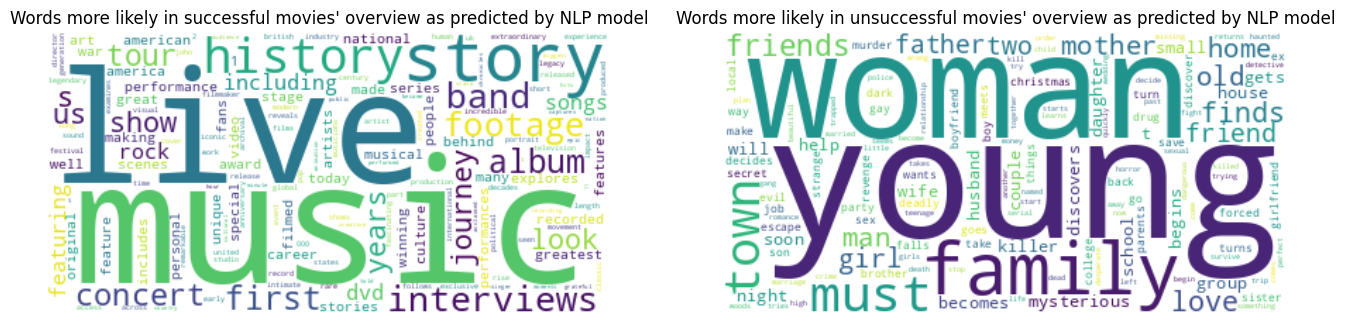

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Words more in group A (positive values)
wordcloud_a = WordCloud(background_color='white').generate_from_frequencies({
    k: v for k, v in word_scores.items() if v > 0
})

# Words more in group B (negative values)
wordcloud_b = WordCloud(background_color='white').generate_from_frequencies({
    k: abs(v) for k, v in word_scores.items() if v < 0
})

# Plot both
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.title("Words more likely in successful movies' overview as predicted by NLP model")
plt.imshow(wordcloud_a, interpolation='bilinear')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Words more likely in unsuccessful movies' overview as predicted by NLP model")
plt.imshow(wordcloud_b, interpolation='bilinear')
plt.axis("off")

plt.show()


# Final Modeling

In [5]:
import pandas as pd
pd.set_option('display.max_columns', None)
df_pd.head()

,id,title,original_title,release_date,popularity,vote_average,vote_count,budget,revenue,runtime,status,tagline,homepage,imdb_id,overview,adult,video,original_language,poster_path,backdrop_path,genres,production_companies,production_countries,spoken_languages,genre_Drama,genre_Documentary,genre_Comedy,genre_Horror,genre_Thriller,genre_Romance,genre_Action,genre_Music,genre_TV Movie,genre_Animation,genre_Science Fiction,genre_Crime,genre_Family,genre_Mystery,genre_Adventure,company_BBC,company_Lifetime,company_Universal Pictures,company_Reel One Entertainment,company_Warner Bros. Pictures,company_HBO Documentary Films,company_Lionsgate,company_MarVista Entertainment,company_The Asylum,company_Paramount Pictures,language_English,language_Español,language_Français,language_Deutsch,language_No Language,language_Italiano,language_,language_Português,language_Pусский,language_العربية,movie_id,Producer_name_1,Producer_name_1_popularity,Producer_name_2,Producer_name_2_popularity,Producer_name_3,Producer_name_3_popularity,Producer_name_4,Producer_name_4_popularity,Producer_name_5,Producer_name_5_popularity,Director_name_1,Director_name_1_popularity,Director_name_2,Director_name_2_popularity,Director_name_3,Director_name_3_popularity,Director_name_4,Director_name_4_popularity,Director_name_5,Director_name_5_popularity,Writer_name_1,Writer_name_1_popularity,Writer_name_2,Writer_name_2_popularity,Writer_name_3,Writer_name_3_popularity,Writer_name_4,Writer_name_4_popularity,Writer_name_5,Writer_name_5_popularity,Musician_name_1,Musician_name_1_popularity,Musician_name_2,Musician_name_2_popularity,Musician_name_3,Musician_name_3_popularity,Musician_name_4,Musician_name_4_popularity,Musician_name_5,Musician_name_5_popularity,movie_idcredits_df,Actor_1_name,Actor_1_popularity,Actor_2_name,Actor_2_popularity,Actor_3_name,Actor_3_popularity,Actor_4_name,Actor_4_popularity,Actor_5_name,Actor_5_popularity,Actor_6_name,Actor_6_popularity,Actor_7_name,Actor_7_popularity,Actor_8_name,Actor_8_popularity,Actor_9_name,Actor_9_popularity,Actor_10_name,Actor_10_popularity,tagline_right,overview_right,vote_average_right,overview_clean,tagline_clean,vote_avg_nlp,is_test
0,98,Gladiator,Gladiator,2000-05-04,5.174,8.218,19470,103000000,465361176,155,Released,What we do in life echoes in eternity.,,tt0172495,"After the death of Emperor Marcus Aurelius, hi...",False,False,en,/ty8TGRuvJLPUmAR1H1nRIsgwvim.jpg,/Ar7QuJ7sJEiC0oP3I8fKBKIQD9u.jpg,"[Action, Drama, Adventure]","[Universal Pictures, Scott Free Productions, R...","[""United Kingdom"", ""United States of America""]",[English],1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,98.0,David Franzoni,0.012,Douglas Wick,0.010,Branko Lustig,0.003,None,NaN,None,NaN,Ridley Scott,0.047,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,98.0,Russell Crowe,0.088,Joaquin Phoenix,0.086,Connie Nielsen,0.082,Tommy Flanagan,0.052,Derek Jacobi,0.043,Djimon Hounsou,0.040,Spencer Treat Clark,0.037,Ralf Moeller,0.034,Omid Djalili,0.031,Sven-Ole Thorsen,0.029,What we do in life echoes in eternity.,"After the death of Emperor Marcus Aurelius, hi...",8.218,emperor aurelius devious son take power demote...,what we do in life echoes in eternity.,5.728187,0
1,77,Memento,Memento,2000-10-11,4.971,8.176,15144,9000000,40047236,113,Released,Some memories are best forgotten.,,tt0209144,Leonard Shelby is tracking down the man who ra...,False,False,en,/fKTPH2WvH8nHTXeBYBVhawtRqtR.jpg,/7Wev9JMo6R5XAfz2KDvXb7oPMmy.jpg,"[Mystery, Thriller]","[Newmarket Films, Summit Entertainment, Team T...","[""United States of America""]",[English],0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,77.0,Jennifer Todd,0.006,Suzanne Todd,0.003,None,NaN,None,NaN,None,NaN,Christopher Nolan,0.080,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,77.0,Guy Pearce,0.105,Carrie-Anne

,proportion
video,
False,1.0


In [8]:
df_pd.head()

,id,title,original_title,release_date,popularity,vote_average,vote_count,budget,revenue,runtime,status,tagline,homepage,imdb_id,overview,adult,video,original_language,poster_path,backdrop_path,genres,production_companies,production_countries,spoken_languages,genre_Drama,genre_Documentary,genre_Comedy,genre_Horror,genre_Thriller,genre_Romance,genre_Action,genre_Music,genre_TV Movie,genre_Animation,genre_Science Fiction,genre_Crime,genre_Family,genre_Mystery,genre_Adventure,company_BBC,company_Lifetime,company_Universal Pictures,company_Reel One Entertainment,company_Warner Bros. Pictures,company_HBO Documentary Films,company_Lionsgate,company_MarVista Entertainment,company_The Asylum,company_Paramount Pictures,language_English,language_Español,language_Français,language_Deutsch,language_No Language,language_Italiano,language_,language_Português,language_Pусский,language_العربية,movie_id,Producer_name_1,Producer_name_1_popularity,Producer_name_2,Producer_name_2_popularity,Producer_name_3,Producer_name_3_popularity,Producer_name_4,Producer_name_4_popularity,Producer_name_5,Producer_name_5_popularity,Director_name_1,Director_name_1_popularity,Director_name_2,Director_name_2_popularity,Director_name_3,Director_name_3_popularity,Director_name_4,Director_name_4_popularity,Director_name_5,Director_name_5_popularity,Writer_name_1,Writer_name_1_popularity,Writer_name_2,Writer_name_2_popularity,Writer_name_3,Writer_name_3_popularity,Writer_name_4,Writer_name_4_popularity,Writer_name_5,Writer_name_5_popularity,Musician_name_1,Musician_name_1_popularity,Musician_name_2,Musician_name_2_popularity,Musician_name_3,Musician_name_3_popularity,Musician_name_4,Musician_name_4_popularity,Musician_name_5,Musician_name_5_popularity,movie_idcredits_df,Actor_1_name,Actor_1_popularity,Actor_2_name,Actor_2_popularity,Actor_3_name,Actor_3_popularity,Actor_4_name,Actor_4_popularity,Actor_5_name,Actor_5_popularity,Actor_6_name,Actor_6_popularity,Actor_7_name,Actor_7_popularity,Actor_8_name,Actor_8_popularity,Actor_9_name,Actor_9_popularity,Actor_10_name,Actor_10_popularity,tagline_right,overview_right,vote_average_right,overview_clean,tagline_clean,vote_avg_nlp,is_test
0,98,Gladiator,Gladiator,2000-05-04,5.174,8.218,19470,103000000,465361176,155,Released,What we do in life echoes in eternity.,,tt0172495,"After the death of Emperor Marcus Aurelius, hi...",False,False,en,/ty8TGRuvJLPUmAR1H1nRIsgwvim.jpg,/Ar7QuJ7sJEiC0oP3I8fKBKIQD9u.jpg,"[Action, Drama, Adventure]","[Universal Pictures, Scott Free Productions, R...","[""United Kingdom"", ""United States of America""]",[English],1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,98.0,David Franzoni,0.012,Douglas Wick,0.010,Branko Lustig,0.003,None,NaN,None,NaN,Ridley Scott,0.047,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,98.0,Russell Crowe,0.088,Joaquin Phoenix,0.086,Connie Nielsen,0.082,Tommy Flanagan,0.052,Derek Jacobi,0.043,Djimon Hounsou,0.040,Spencer Treat Clark,0.037,Ralf Moeller,0.034,Omid Djalili,0.031,Sven-Ole Thorsen,0.029,What we do in life echoes in eternity.,"After the death of Emperor Marcus Aurelius, hi...",8.218,emperor aurelius devious son take power demote...,what we do in life echoes in eternity.,5.728187,0
1,77,Memento,Memento,2000-10-11,4.971,8.176,15144,9000000,40047236,113,Released,Some memories are best forgotten.,,tt0209144,Leonard Shelby is tracking down the man who ra...,False,False,en,/fKTPH2WvH8nHTXeBYBVhawtRqtR.jpg,/7Wev9JMo6R5XAfz2KDvXb7oPMmy.jpg,"[Mystery, Thriller]","[Newmarket Films, Summit Entertainment, Team T...","[""United States of America""]",[English],0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,77.0,Jennifer Todd,0.006,Suzanne Todd,0.003,None,NaN,None,NaN,None,NaN,Christopher Nolan,0.080,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,77.0,Guy Pearce,0.105,Carrie-Anne

In [6]:
df_pd_filt = df_pd.drop(['id','title','original_title','release_date','popularity','vote_count','revenue','status','tagline','homepage','imdb_id','overview','adult','video','poster_path','backdrop_path',
                         'genres','production_companies','spoken_languages','movie_id','movie_idcredits_df','tagline_clean','overview_clean','tagline_right','overview_right','vote_average_right'],axis=1)

In [9]:
dominant_columns = []

for col in df_pd_filt.columns:
  print(col)
  top_value_ratio = df_pd_filt[col].value_counts(normalize=True, dropna=False).iloc[0]
  if top_value_ratio > 0.98:
    dominant_columns.append(col)

print(dominant_columns)

vote_average
budget
runtime
original_language
production_countries
genre_Drama
genre_Documentary
genre_Comedy
genre_Horror
genre_Thriller
genre_Romance
genre_Action
genre_Music
genre_TV Movie
genre_Animation
genre_Science Fiction
genre_Crime
genre_Family
genre_Mystery
genre_Adventure
company_BBC
company_Lifetime
company_Universal Pictures
company_Reel One Entertainment
company_Warner Bros. Pictures
company_HBO Documentary Films
company_Lionsgate
company_MarVista Entertainment
company_The Asylum
company_Paramount Pictures
language_English
language_Español
language_Français
language_Deutsch
language_No Language
language_Italiano
language_
language_Português
language_Pусский
language_العربية
Producer_name_1
Producer_name_1_popularity
Producer_name_2
Producer_name_2_popularity
Producer_name_3
Producer_name_3_popularity
Producer_name_4
Producer_name_4_popularity
Producer_name_5
Producer_name_5_popularity
Director_name_1
Director_name_1_popularity
Director_name_2
Director_name_2_popularity
D

In [ ]:
df_pd['production_companies'].value_counts()